# Clustering 4 - Evaluating clustering

## Introduction

- During the last couple of weeks we have learned about different methods for clustering data.
- But how do we know if the clusters we obtain are good?

### Motivation

- Consider the following examples:

In [18]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(42)
n_per = 60
means = np.array([[0.0, 0.0],
                  [5.0, 0.0],
                  [2.5, 4.0]])
covs = [0.4 * np.eye(2), 0.6 * np.eye(2), 0.35 * np.eye(2)]

clusters1 = [rng.multivariate_normal(mean, cov, size=n_per) for mean, cov in zip(means, covs)]


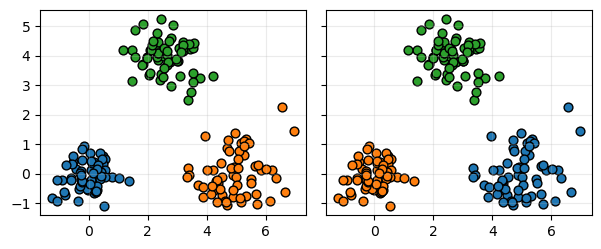

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(6, 4), sharex=True, sharey=True)
colors = ['tab:blue', 'tab:orange', 'tab:green']
colors_cluster = ['tab:orange', 'tab:blue', 'tab:green']

# Left plot
ax = axes[0]
for k in range(3):
    ax.scatter(clusters1[k][:, 0], clusters1[k][:, 1], c=colors[k], s=40, edgecolor='k')
ax.set_aspect('equal', 'box')
ax.grid(alpha=0.25)

# Right plot
ax = axes[1]
for k in range(3):
    ax.scatter(clusters1[k][:, 0], clusters1[k][:, 1], c=colors_cluster[k], s=40, edgecolor='k')
ax.set_aspect('equal', 'box')
ax.grid(alpha=0.25)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [20]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(42)
n_per = 60

# move means closer and increase covariance to create stronger overlap
means = np.array([[1.5, 0.5],
                  [4.0, -0.2],
                  [2.7, 2.2]])
covs = [2.0 * np.eye(2), 1.7 * np.eye(2), 1.5 * np.eye(2)]

clusters1 = [rng.multivariate_normal(mean, cov, size=n_per) for mean, cov in zip(means, covs)]



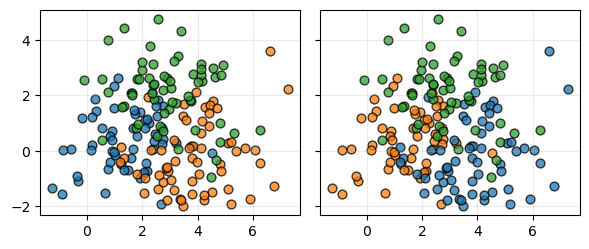

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(6, 4), sharex=True, sharey=True)
colors = ['tab:blue', 'tab:orange', 'tab:green']
colors_cluster = ['tab:orange', 'tab:blue', 'tab:green']

# Left plot
ax = axes[0]
for k in range(3):
    ax.scatter(clusters1[k][:, 0], clusters1[k][:, 1], c=colors[k], s=40, edgecolor='k', alpha=0.75)
ax.set_aspect('equal', 'box')
ax.grid(alpha=0.25)

# Right plot (same data, different color order)
ax = axes[1]
for k in range(3):
    ax.scatter(clusters1[k][:, 0], clusters1[k][:, 1], c=colors_cluster[k], s=40, edgecolor='k', alpha=0.75)

ax.set_aspect('equal', 'box')
ax.grid(alpha=0.25)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Clustering accuracy

- Standard accuracy is computed as:
- Index for a particular class is (usually) arbitrary!
    - No reason the cluster predictions should have the same value as the true labels.


### An assignment problem

- A fundamental combinatorial optimization problem:
    - :
- Stanard approach in clustering: [**Hungarian algorithmh**](https://en.wikipedia.org/wiki/Hungarian_algorithm)
- [**Scipy implementation**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linear_sum_assignment.html)
- General procedure:
    - Solve assignment problem with Hungarian algorithm.
    - Compute accuracy as usual.

## Normalized mutual information

- An alternative quality measure is normalized mutual information: $$ NMI(Y, \hat{Y})=\frac{2 I(Y, \hat{Y})}{H(Y), H(\hat{Y})}$$

### Normalized mutual information

- Understanding $I(Y, \hat{Y})$:
- [**Scikit learn implementation**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.normalized_mutual_info_score.html)

## Silhouette score

- Both clustering accuracy and normalized mutual information assumes access to the true lables.
- What if that is not available?
- Several options, but the Silhoutte score is widely used.
- Measure how similar an object is to its own cluster compare to other clusters.

### Silhouette score

- Computation:
- [**Scikit learn implementation**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)

## Programming exercises

Below are programming exercises assocaited with this lecture. These cell blocks are starting points that loads the data and prepares the problem such that you can get going with the implementation. There are also theoretical exercsies, but due to copyright we cannot shared them here. They will be made available in a private repository connected to the course.


### Cluster the Iris dataset and evaluate the clustering quality

Cluster the Iris data below with your clustering algorithm of choice. Evaluate the resulting clusters with your own implementation of clustering accuracy, normalized mutual information, and the silhouette score. You can use the Scipy function for solving the assignment problem in the clustering accuracy computation. Compare your implementation with the output of existing implementations.

Cluster the Iris data with different clustering methods and compare the performance. Which method gives you the best clustering performance?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

# fetch dataset 
iris = fetch_ucirepo(id=53)
  
# data (as pandas dataframes) 
X = iris.data.features.iloc[:, :2]
X_1_name = 'sepal length (cm)'
X_2_name = 'sepal width (cm)'
y = np.zeros(150)
y[50:100] = 1
y[100:150] = 2
y_names = iris.data.targets


plt.figure(1)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.xlabel(X_1_name)
plt.ylabel(X_2_name)
plt.show()
